In [324]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.subplots as subplots
import cufflinks as cf
from plotly.offline import iplot
import plotly.graph_objs as go
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [325]:
from sklearn.linear_model import LinearRegression,Ridge,SGDRegressor,ElasticNet
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.utils.validation import check_array 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor

In [326]:
m=pd.read_csv('matches.csv')


In [327]:
d=pd.read_csv('deliveries.csv')


In [328]:
m.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [329]:
m.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [330]:
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [331]:
m.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [332]:
d.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [333]:
d.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [334]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [335]:
d.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

## DATA PRE PROCESSING

In [336]:

#Filling the values of city based on venue
conditions = [m["venue"] == "Rajiv Gandhi International Stadium, Uppal",m["venue"] == "Maharashtra Cricket Association Stadium",
              m["venue"] == "Saurashtra Cricket Association Stadium", m["venue"] == "Holkar Cricket Stadium",
              m["venue"] == "M Chinnaswamy Stadium",m["venue"] == "Wankhede Stadium",
              m["venue"] == "Eden Gardens",m["venue"] == "Feroz Shah Kotla",
              m["venue"] == "Punjab Cricket Association IS Bindra Stadium, Mohali",m["venue"] == "Green Park",
              m["venue"] == "Punjab Cricket Association Stadium, Mohali",m["venue"] == "Dr DY Patil Sports Academy",
              m["venue"] == "Sawai Mansingh Stadium", m["venue"] == "MA Chidambaram Stadium, Chepauk", 
              m["venue"] == "Newlands", m["venue"] == "St George's Park" , 
              m["venue"] == "Kingsmead", m["venue"] == "SuperSport Park",
              m["venue"] == "Buffalo Park", m["venue"] == "New Wanderers Stadium",
              m["venue"] == "De Beers Diamond Oval", m["venue"] == "OUTsurance Oval", 
              m["venue"] == "Brabourne Stadium",m["venue"] == "Sardar Patel Stadium", 
              m["venue"] == "Barabati Stadium", m["venue"] == "Vidarbha Cricket Association Stadium, Jamtha",
              m["venue"] == "Himachal Pradesh Cricket Association Stadium",m["venue"] == "Nehru Stadium",
              m["venue"] == "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",m["venue"] == "Subrata Roy Sahara Stadium",
              m["venue"] == "Shaheed Veer Narayan Singh International Stadium",m["venue"] == "JSCA International Stadium Complex",
              m["venue"] == "Sheikh Zayed Stadium",m["venue"] == "Sharjah Cricket Stadium",
              m["venue"] == "Dubai International Cricket Stadium",m["venue"] == "M. A. Chidambaram Stadium",
              m["venue"] == "Feroz Shah Kotla Ground",m["venue"] == "M. Chinnaswamy Stadium",
              m["venue"] == "Rajiv Gandhi Intl. Cricket Stadium" ,m["venue"] == "IS Bindra Stadium",m["venue"] == "ACA-VDCA Stadium"]
values = ['Hyderabad', 'Mumbai', 'Rajkot',"Indore","Bengaluru","Mumbai","Kolkata","Delhi","Mohali","Kanpur","Mohali","Pune","Jaipur","Chennai","Cape Town","Port Elizabeth","Durban",
          "Centurion",'Eastern Cape','Johannesburg','Northern Cape','Bloemfontein','Mumbai','Ahmedabad','Cuttack','Jamtha','Dharamshala','Chennai','Visakhapatnam','Pune','Raipur','Ranchi',
          'Abu Dhabi','Sharjah','Dubai','Chennai','Delhi','Bengaluru','Hyderabad','Mohali','Visakhapatnam']
m['city'] = np.where(m['city'].isnull(),
                              np.select(conditions, values),
                              m['city'])

In [337]:
m=m[m["winner"].notna()]

In [338]:
#Replacing the Rising Pune Supergiant with Rising Pune Supergiants
m["team2"]=m["team2"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
m["team1"]=m["team1"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
m["winner"]=m["winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
m["toss_winner"]=m["toss_winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")


In [339]:
#Replacing the Delhi Daredevils with Delhi Capitals
m["team2"]=m["team2"].replace("Delhi Daredevils","Delhi Capitals")
m["team1"]=m["team1"].replace("Delhi Daredevils","Delhi Capitals")
m["winner"]=m["winner"].replace("Delhi Daredevils","Delhi Capitals")
m["toss_winner"]=m["toss_winner"].replace("Delhi Daredevils","Delhi Capitals")

In [340]:
from sklearn import preprocessing

In [341]:
m.drop(['umpire1'],axis=1,inplace=True)
m.drop(['umpire2'],axis=1,inplace=True)
m.drop(['umpire3'],axis=1,inplace=True)

## EDA

In [342]:
winsp = m.groupby('season')['winner'].value_counts()
winsp

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Capitals                  7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [343]:

season = 2008
max_wins = pd.DataFrame(columns=['season', 'team', 'wins'])
for items in winsp.iteritems():    
    if items[0][0]==season:
        print(items)
        win_series = pd.DataFrame({
            'season': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        max_wins = max_wins.append(win_series)
        season += 1  

((2008, 'Rajasthan Royals'), 13)


C:\Users\jhapr\AppData\Local\Temp\ipykernel_20028\4203489704.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\jhapr\AppData\Local\Temp\ipykernel_20028\4203489704.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\jhapr\AppData\Local\Temp\ipykernel_20028\4203489704.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\jhapr\AppData\Local\Temp\ipykernel_20028\4203489704.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\jhapr\AppData\Local\Temp\ipykernel_20028\4203489704.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

((2009, 'Delhi Capitals'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


C:\Users\jhapr\AppData\Local\Temp\ipykernel_20028\4203489704.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\jhapr\AppData\Local\Temp\ipykernel_20028\4203489704.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\jhapr\AppData\Local\Temp\ipykernel_20028\4203489704.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\jhapr\AppData\Local\Temp\ipykernel_20028\4203489704.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\jhapr\AppData\Local\Temp\ipykernel_20028\4203489704.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

In [344]:
max_wins

,season,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Capitals,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


C:\Users\jhapr\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



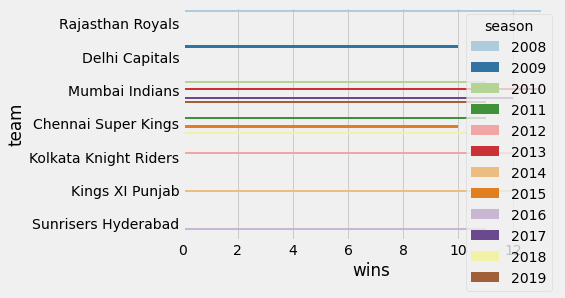

In [345]:
sns.barplot('wins', 'team', hue='season', data=max_wins, palette='Paired');

<AxesSubplot:xlabel='count', ylabel='team'>

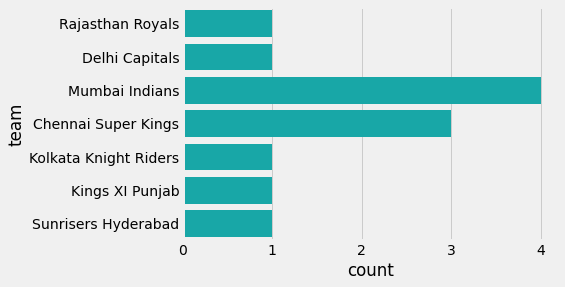

In [346]:
sns.countplot(y="team", data=max_wins, color="c")

<AxesSubplot:xlabel='wins', ylabel='count'>

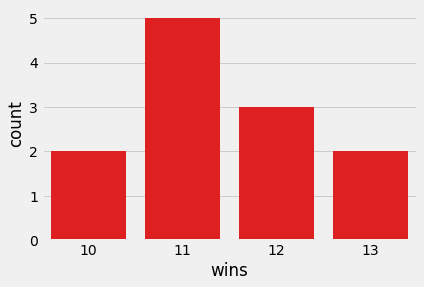

In [347]:
sns.countplot(x="wins", data=max_wins, color="r")

**Rajasthan royals** in 2008 and Mumbai Indians in 2013 each have won the maximum number of matches in a season that is **13**.But **Rajasthan royals** in 2008 won 13 in 16 matches whereas **Mumbai Indians** played 19 matches in 2013.Also Mumbai Indians have won the max matches in a season most number of times.

In [348]:
matches_by_venue= pd.DataFrame(m['venue'].value_counts()).reset_index()
matches_by_venue.rename(columns = {'index':'venue', 'venue':'matches'}, inplace = True)
   
matches_by_venue

,venue,matches
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,71
3,Feroz Shah Kotla,66
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Subrata Roy Sahara Stadium,17


In [349]:
data = [go.Bar(x=matches_by_venue['venue'].head(10), 
               y=matches_by_venue["matches"].head(10), 
               marker=dict(color='#EB89B5'),opacity=1.00)]

layout = go.Layout(title='Matches by Venue ',
                   xaxis=dict(title='Matches',tickmode='linear'),
                   yaxis=dict(title='Venue'),bargap=0.05)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

**Eden garden** has hosted the most number of matches that is 77 closely followed by the **Wankhede** with 73 and **chinnaswamy** with 71.

,team,winp
0,Pune Warriors,26.666667
1,Deccan Chargers,38.666667
2,Kochi Tuskers Kerala,42.857143
3,Gujarat Lions,43.333333
4,Delhi Capitals,44.000000
5,Kings XI Punjab,46.590909
6,Royal Challengers Bangalore,47.457627
7,Rising Pune Supergiants,50.000000
8,Kolkata Knight Riders,51.685393
9,Rajasthan Royals,51.724138


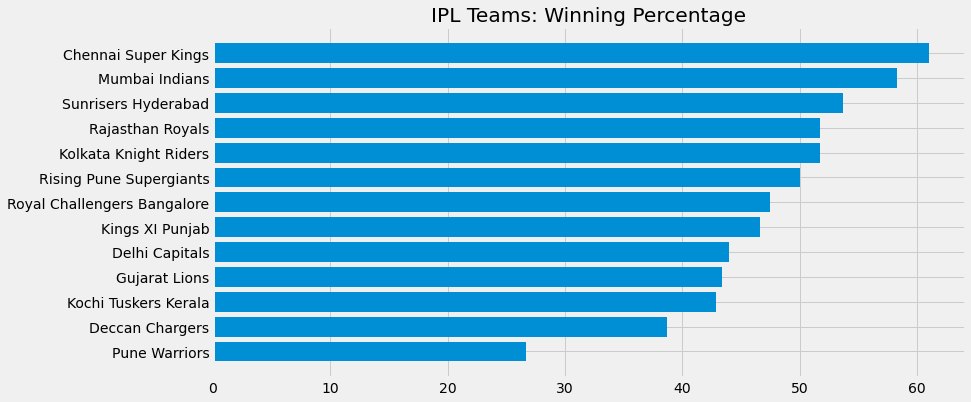

In [350]:
df = m[['team1', 'team2', 'winner']]
teams = df.team1.unique()
winPercent = []

for each_team in teams:
    played_matches = np.count_nonzero(df['team1'].astype(str).str.contains(each_team)) + np.count_nonzero(df['team2'].astype(str).str.contains(each_team))
    matches_won = np.count_nonzero(df['winner'].astype(str).str.contains(each_team))   
    winPercent.append(100 * (matches_won / played_matches))
    
winPercent, teams = zip(*sorted(zip(winPercent, teams)))
win_percentage = pd.DataFrame(
    {'team': teams,
     'winp': winPercent,
    })
display(win_percentage)
plt.figure(figsize=(12,6))
plt.barh(range(len(winPercent)), winPercent, align='center')
plt.yticks(range(len(winPercent)), teams)
plt.title("IPL Teams: Winning Percentage")
plt.show()

**Chennai Super Kings** have won 60.97 percentage of their matches,which is the highest.

In [351]:
m['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: player_of_match, Length: 226, dtype: int64

**Chris Gayle** has won the most man of the matches award that is 21.

,team,winp
0,Sunrisers Hyderabad,42.592593
1,Rising Pune Supergiants,43.333333
2,Pune Warriors,44.444444
3,Royal Challengers Bangalore,45.197740
4,Kings XI Punjab,46.022727
5,Gujarat Lions,50.000000
6,Delhi Capitals,50.857143
7,Kolkata Knight Riders,51.685393
8,Mumbai Indians,52.406417
9,Rajasthan Royals,53.793103


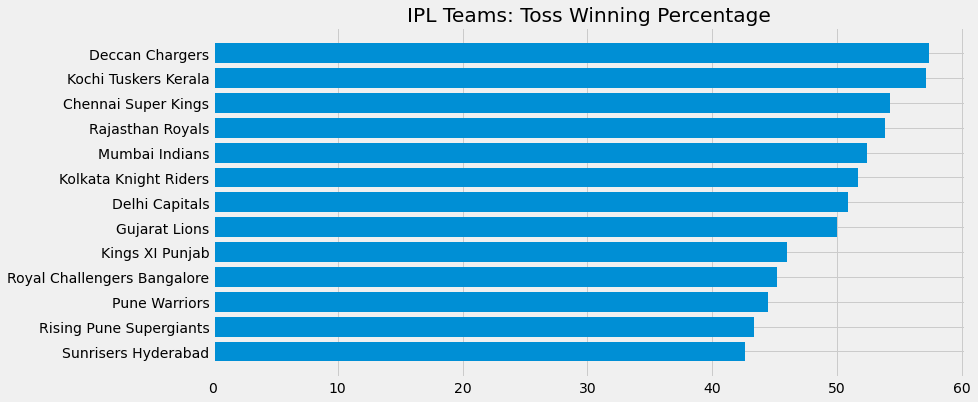

In [352]:
df = m[['team1', 'team2', 'toss_winner']]
teams = df.team1.unique()
winPercent = []

for each_team in teams:
    played_matches = np.count_nonzero(df['team1'].astype(str).str.contains(each_team)) + np.count_nonzero(df['team2'].astype(str).str.contains(each_team))
    toss_won = np.count_nonzero(df['toss_winner'].astype(str).str.contains(each_team))   
    winPercent.append(100 * (toss_won / played_matches))

winPercent, teams = zip(*sorted(zip(winPercent, teams)))

win_percentage = pd.DataFrame(
    {'team': teams,
     
     'winp': winPercent,
    })
display(win_percentage)
plt.figure(figsize=(12,6))
plt.barh(range(len(winPercent)), winPercent, align='center')
plt.yticks(range(len(winPercent)), teams)
plt.title("IPL Teams: Toss Winning Percentage")
plt.show()

In [353]:

cen = d.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
cen = cen[cen['batsman_runs']>=100]
cen = cen.groupby(['batsman']).agg({'count'})
cen.columns = cen.columns.droplevel()
cen = cen.sort_values(by='count',ascending=False).reset_index()
cen = cen.head(27)

In [354]:
half_cen = d.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
half_cen = half_cen[half_cen['batsman_runs']>=50]
half_cen = half_cen[half_cen['batsman_runs']<100]
half_cen = half_cen.groupby(['batsman']).agg({'count'})
half_cen.columns = half_cen.columns.droplevel()
half_cen = half_cen.sort_values(by='count',ascending=False).reset_index()
half_cen =half_cen.head(27)

In [355]:

fig = {"data" : [{"x" : cen["batsman"],"y" : cen["count"],
                  "name" : "100s","marker" : {"color" : "pink","size": 13},
                  "line": {"width" : 3},"type" : "scatter","mode" : "lines+markers" ,
                  "xaxis" : "x1","yaxis" : "y1"},
        
                 {"x" : half_cen["batsman"],"y" : half_cen["count"],
                  "name" : "50s","marker" : {"color" : "black","size": 13},
                  "type" : "scatter","line": {"width" : 3},"mode" : "lines+markers",
                  "xaxis" : "x2","yaxis" : "y2"}],
       
        "layout" : {"title": "Total centuries and half-centuries by top batsman",
                    "xaxis2" : {"domain" : [0, 1],"anchor" : "y2",
                    "showticklabels" : True},"margin" : {"b" : 111},
                    "yaxis2" : {"domain" : [.55, 1],"anchor" : "x2","title": "50s"},                    
                    "xaxis" : {"domain" : [0, 1],"tickmode":'linear',"title": "Batsman"},
                    "yaxis" : {"domain" :[0, .45], "anchor" : "x2","title": "100s"}}}

iplot(fig)

In [356]:
def team1_vs_team2(team1,team2):
    mt1=m[((m['team1']==team1)|(m['team2']==team1))&((m['team1']==team2)|(m['team2']==team2))]
    sns.countplot(x='season', hue='winner',data=mt1,palette='YlOrBr')
    plt.xticks(rotation='vertical')
    leg = plt.legend( loc = 'upper center')
    fig=plt.gcf()
    fig.set_size_inches(10,6)
    plt.show()
   

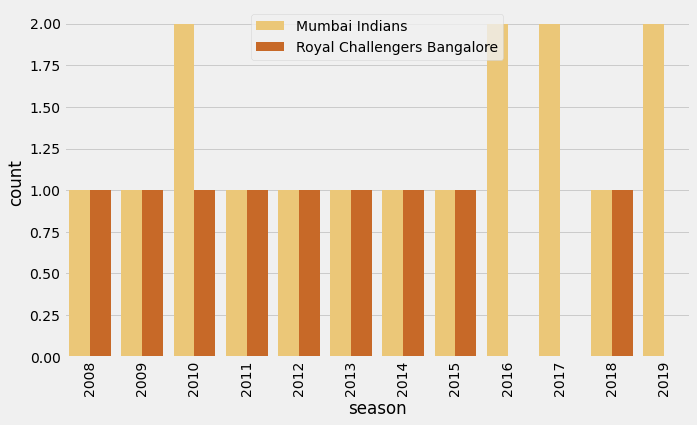

In [357]:
team1_vs_team2('Royal Challengers Bangalore','Mumbai Indians')

In [358]:
df = m[['winner','win_by_runs','win_by_wickets']]
df['loser'] = m.apply(lambda x : x['team2'] if x['team1']==x['winner'] else x['team1'], axis=1)
wrunss=df[['winner','loser','win_by_runs']]
wrunss=wrunss.sort_values(by=['win_by_runs'],ascending=False).head(10)
wrunss['team1vsteam2']=wrunss['winner'] + ' vs '+wrunss['loser']
wrunss

,winner,loser,win_by_runs,team1vsteam2
43,Mumbai Indians,Delhi Capitals,146,Mumbai Indians vs Delhi Capitals
619,Royal Challengers Bangalore,Gujarat Lions,144,Royal Challengers Bangalore vs Gujarat Lions
59,Kolkata Knight Riders,Royal Challengers Bangalore,140,Kolkata Knight Riders vs Royal Challengers Ban...
556,Royal Challengers Bangalore,Kings XI Punjab,138,Royal Challengers Bangalore vs Kings XI Punjab
410,Royal Challengers Bangalore,Pune Warriors,130,Royal Challengers Bangalore vs Pune Warriors
706,Sunrisers Hyderabad,Royal Challengers Bangalore,118,Sunrisers Hyderabad vs Royal Challengers Banga...
295,Kings XI Punjab,Royal Challengers Bangalore,111,Kings XI Punjab vs Royal Challengers Bangalore
114,Rajasthan Royals,Delhi Capitals,105,Rajasthan Royals vs Delhi Capitals
676,Mumbai Indians,Kolkata Knight Riders,102,Mumbai Indians vs Kolkata Knight Riders
182,Mumbai Indians,Delhi Capitals,98,Mumbai Indians vs Delhi Capitals


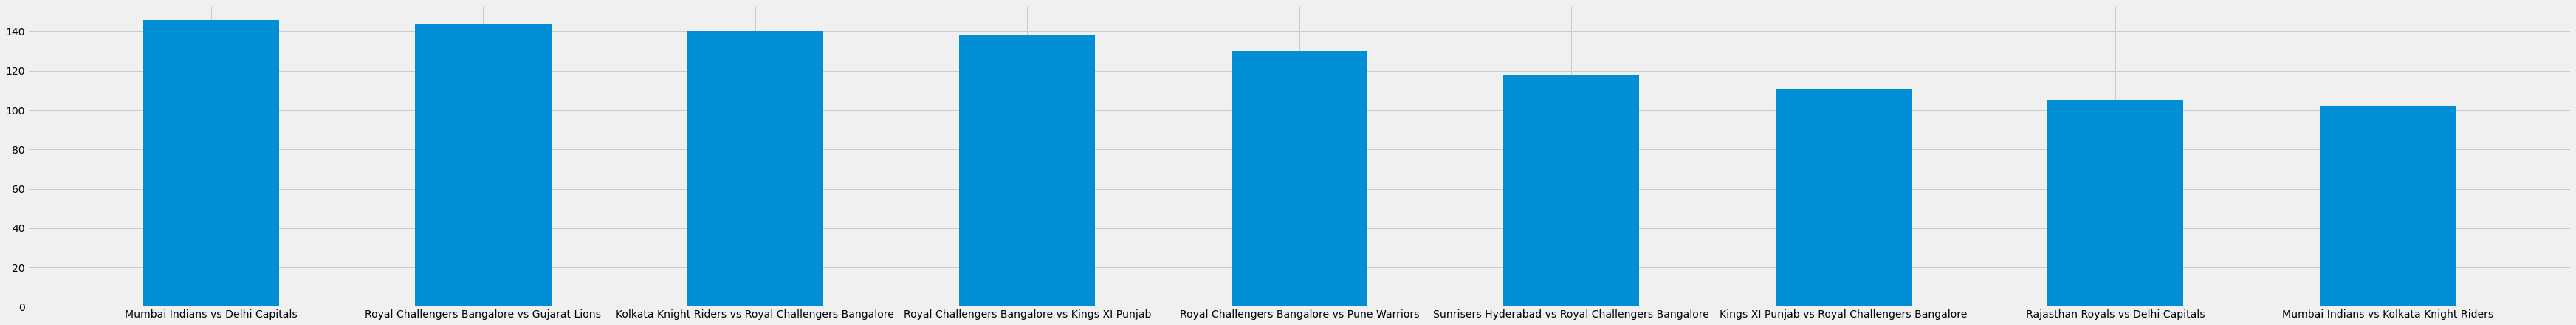

In [359]:
x=wrunss['team1vsteam2']
y=wrunss['win_by_runs']
fig, ax = plt.subplots(figsize=(55,7))
bars = ax.bar(x,y, width=0.5)

In [360]:
df = m[['winner','win_by_runs','win_by_wickets']]
df['loser'] = m.apply(lambda x : x['team2'] if x['team1']==x['winner'] else x['team1'], axis=1)
wruns=df[['winner','loser','win_by_wickets']]
wruns=wruns.sort_values(by=['win_by_wickets'],ascending=False).head(10)
wruns['team1vsteam2']=wruns['winner'] + ' vs '+wruns['loser']
wruns

,winner,loser,win_by_wickets,team1vsteam2
390,Chennai Super Kings,Kings XI Punjab,10,Chennai Super Kings vs Kings XI Punjab
2,Kolkata Knight Riders,Gujarat Lions,10,Kolkata Knight Riders vs Gujarat Lions
183,Royal Challengers Bangalore,Rajasthan Royals,10,Royal Challengers Bangalore vs Rajasthan Royals
376,Mumbai Indians,Rajasthan Royals,10,Mumbai Indians vs Rajasthan Royals
119,Delhi Capitals,Kings XI Punjab,10,Delhi Capitals vs Kings XI Punjab
683,Royal Challengers Bangalore,Kings XI Punjab,10,Royal Challengers Bangalore vs Kings XI Punjab
34,Kings XI Punjab,Delhi Capitals,10,Kings XI Punjab vs Delhi Capitals
71,Deccan Chargers,Mumbai Indians,10,Deccan Chargers vs Mumbai Indians
542,Royal Challengers Bangalore,Delhi Capitals,10,Royal Challengers Bangalore vs Delhi Capitals
298,Rajasthan Royals,Mumbai Indians,10,Rajasthan Royals vs Mumbai Indians


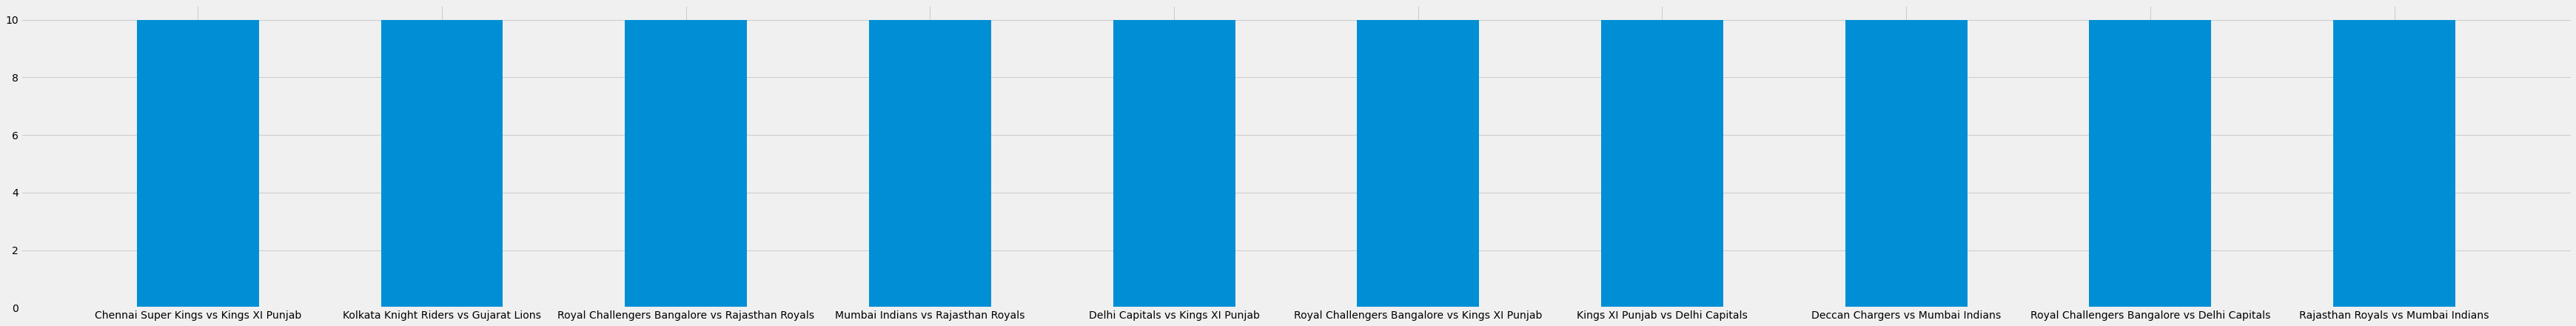

In [361]:
x=wruns['team1vsteam2']
y=wruns['win_by_wickets']
fig, ax = plt.subplots(figsize=(55,7))
bars = ax.bar(x,y, width=0.5)

In [362]:
d=d.drop(['dismissal_kind','fielder'],axis = 1)


## ML

In [363]:

data = pd.merge(m,d,left_on='id',right_on='match_id',how='left')
print(data.shape)
data.head()

(178706, 34)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,0,0,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,0,0,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,4,0,4,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,0,0,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,2,0,0,0,0,0,2,2,NaN


In [364]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178706 entries, 0 to 178705
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                178706 non-null  int64 
 1   season            178706 non-null  int64 
 2   city              178706 non-null  object
 3   date              178706 non-null  object
 4   team1             178706 non-null  object
 5   team2             178706 non-null  object
 6   toss_winner       178706 non-null  object
 7   toss_decision     178706 non-null  object
 8   result            178706 non-null  object
 9   dl_applied        178706 non-null  int64 
 10  winner            178706 non-null  object
 11  win_by_runs       178706 non-null  int64 
 12  win_by_wickets    178706 non-null  int64 
 13  player_of_match   178706 non-null  object
 14  venue             178706 non-null  object
 15  match_id          178706 non-null  int64 
 16  inning            178706 non-null  int

In [365]:
data.isnull().sum()

id                       0
season                   0
city                     0
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
dl_applied               0
winner                   0
win_by_runs              0
win_by_wickets           0
player_of_match          0
venue                    0
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    169895
dtype: int64

In [366]:
# data.drop(['umpire1', 'umpire2'],axis=1,inplace=True)

In [367]:
# 
str_cols = data.columns[data.dtypes==object]
data[str_cols] = data[str_cols].fillna(0)

In [368]:
# Encoding the features to build model

encoder= LabelEncoder()
data["team1"]=encoder.fit_transform(data["team1"])
data["team2"]=encoder.fit_transform(data["team2"])
data["winner"]=encoder.fit_transform(data["winner"].astype(str))
data["toss_winner"]=encoder.fit_transform(data["toss_winner"])
data["venue"]=encoder.fit_transform(data["venue"])


In [369]:
# Encoding Match result, toss result and player dismissed as 1 and 0

data.loc[data["winner"]==data["team1"],"team1_win"]=1
data.loc[data["winner"]!=data["team1"],"team1_win"]=0


data.loc[data["toss_winner"]==data["team1"],"team1_toss_win"]=1
data.loc[data["toss_winner"]!=data["team1"],"team1_toss_win"]=0

data.loc[data["player_dismissed"]==0,"is_wicket"]=0
data.loc[data["player_dismissed"]!=0,"is_wicket"]=1

data["team1_bat"]=0
data.loc[(data["team1_toss_win"]==1) & (data["toss_decision"]=="bat"),"team1_bat"]=1

In [370]:
# Collecting features to build model
prediction_df=data[["team1","team2","team1_toss_win","team1_bat","team1_win","venue"]]
# Dropped correlating features
correlated_features = set()
correlation_matrix = prediction_df.drop('team1_win', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            column = correlation_matrix.columns[i]
            correlated_features.add(column)
            
prediction_df.drop(columns=correlated_features)

,team1,team2,team1_toss_win,team1_win,venue
0,12,11,0.0,1.0,28
1,12,11,0.0,1.0,28
2,12,11,0.0,1.0,28
3,12,11,0.0,1.0,28
4,12,11,0.0,1.0,28
...,...,...,...,...,...
178701,7,0,1.0,1.0,29
178702,7,0,1.0,1.0,29
178703,7,0,1.0,1.0,29
178704,7,0,1.0,1.0,29


In [371]:
data['inning'] = data['id'].astype(str)+(data['batting_team']).astype(str)
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,team1_win,team1_toss_win,is_wicket,team1_bat
0,1,2017,Hyderabad,2017-04-05,12,11,11,field,normal,0,...,0,0,0,0,0,0,1.0,0.0,0.0,0
1,1,2017,Hyderabad,2017-04-05,12,11,11,field,normal,0,...,0,0,0,0,0,0,1.0,0.0,0.0,0
2,1,2017,Hyderabad,2017-04-05,12,11,11,field,normal,0,...,0,0,4,0,4,0,1.0,0.0,0.0,0
3,1,2017,Hyderabad,2017-04-05,12,11,11,field,normal,0,...,0,0,0,0,0,0,1.0,0.0,0.0,0
4,1,2017,Hyderabad,2017-04-05,12,11,11,field,normal,0,...,0,0,0,2,2,0,1.0,0.0,0.0,0


In [372]:
# Innings number
list1 = data['inning'].unique()
(list1)

array(['1Sunrisers Hyderabad', '1Royal Challengers Bangalore',
       '2Mumbai Indians', ..., '11414Chennai Super Kings',
       '11415Mumbai Indians', '11415Chennai Super Kings'], dtype=object)

In [373]:
data2 = data.copy()
data2 = data2.groupby(by=['inning']).sum()['total_runs'].reset_index()
data2.head()

,inning,total_runs
0,100Delhi Daredevils,118
1,100Kings XI Punjab,94
2,101Rajasthan Royals,197
3,101Royal Challengers Bangalore,132
4,102Deccan Chargers,153


In [374]:
data3 = pd.merge(left=data2, right=data, on='inning', how='right')
print(data3.shape)
data3.head()

(178706, 39)


,inning,total_runs_x,id,season,city,date,team1,team2,toss_winner,toss_decision,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,team1_win,team1_toss_win,is_wicket,team1_bat
0,1Sunrisers Hyderabad,207,1,2017,Hyderabad,2017-04-05,12,11,11,field,...,0,0,0,0,0,0,1.0,0.0,0.0,0
1,1Sunrisers Hyderabad,207,1,2017,Hyderabad,2017-04-05,12,11,11,field,...,0,0,0,0,0,0,1.0,0.0,0.0,0
2,1Sunrisers Hyderabad,207,1,2017,Hyderabad,2017-04-05,12,11,11,field,...,0,0,4,0,4,0,1.0,0.0,0.0,0
3,1Sunrisers Hyderabad,207,1,2017,Hyderabad,2017-04-05,12,11,11,field,...,0,0,0,0,0,0,1.0,0.0,0.0,0
4,1Sunrisers Hyderabad,207,1,2017,Hyderabad,2017-04-05,12,11,11,field,...,0,0,0,2,2,0,1.0,0.0,0.0,0


In [375]:
list2 = data['batsman'].unique()


In [376]:
data3.columns

Index(['inning', 'total_runs_x', 'id', 'season', 'city', 'date', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied',
       'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue',
       'match_id', 'batting_team', 'bowling_team', 'over', 'ball', 'batsman',
       'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs',
       'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs',
       'extra_runs', 'total_runs_y', 'player_dismissed', 'team1_win',
       'team1_toss_win', 'is_wicket', 'team1_bat'],
      dtype='object')

In [377]:
#Predict 2015 stats using other season
data4 = data3[data3.season == 2015]
#df.drop(df.loc[df['line_race']==0].index, inplace=True)

In [378]:
# Dropping starting ssns to get better results
data3=data3[data3.season!=2015]
data3=data3[data3.season!=2009]
data3=data3[data3.season!=2008]

In [379]:
#
container = pd.DataFrame()
for i in range(len(list1)):
    one_inning = data3.loc[data3['inning']==list1[i]]
    one_inning = one_inning.sort_values(['over', 'ball'], ascending=[True, True])
    one_inning = one_inning[['over','ball','batsman_runs','team1','team2','winner','toss_winner','extra_runs','venue','is_wicket','total_runs_y','total_runs_x']].reset_index(drop=True)
    one_inning['CUMSUM_runs'] = one_inning['total_runs_y'].cumsum()
    one_inning['CUMSUM_wickets'] = one_inning['is_wicket'].cumsum()

    one_inning.tail()
    frame = [container,one_inning]
    container = pd.concat(frame)
print(data3.shape)
print(container.shape)

(138217, 39)
(138217, 14)


In [380]:
container1 = pd.DataFrame()
for i in range(len(list1)):
    one_inning = data4.loc[data4['inning']==list1[i]]
    one_inning = one_inning.sort_values(['over', 'ball'], ascending=[True, True])
    one_inning = one_inning[['over','ball','batsman_runs','team1','team2','winner','toss_winner','extra_runs','venue','is_wicket','total_runs_y','total_runs_x']].reset_index(drop=True)
    one_inning['CUMSUM_runs'] = one_inning['total_runs_y'].cumsum()
    one_inning['CUMSUM_wickets'] = one_inning['is_wicket'].cumsum()

    one_inning.tail()
    frame = [container1,one_inning]
    container1 = pd.concat(frame)
print(data4.shape)
print(container1.shape)

(13394, 39)
(13394, 14)


In [381]:
#dummies=pd.get_dummies(container.batsman)
#dummies2=pd.get_dummies(container.bowler)

In [382]:
#dummies3=pd.get_dummies(container1.batsman)
#dummies4=pd.get_dummies(container1.bowler)

In [383]:
#container=pd.concat([container,dummies],axis=1)

#container=pd.concat([container,dummies2],axis=1)
#container=container.drop(['batsman','bowler'],axis=1)
#container

In [384]:
#container=container.drop(['WPUJC Vaas','Y Gnaneswara Rao'],axis=1)

In [385]:
#container1=pd.concat([container1,dummies3],axis=1)

#container1=pd.concat([container1,dummies4],axis=1)
#container1=container1.drop(['batsman','bowler'],axis=1)
#container1

In [386]:
#container1=container1.drop(['TM Head','Tejas Baroka'],axis=1)

In [387]:
data3 = container.copy()
data3.head()

,over,ball,batsman_runs,team1,team2,winner,toss_winner,extra_runs,venue,is_wicket,total_runs_y,total_runs_x,CUMSUM_runs,CUMSUM_wickets
0,1,1,0,12,11,12,11,0,28,0.0,0,207,0,0.0
1,1,2,0,12,11,12,11,0,28,0.0,0,207,0,0.0
2,1,3,4,12,11,12,11,0,28,0.0,4,207,4,0.0
3,1,4,0,12,11,12,11,0,28,0.0,0,207,4,0.0
4,1,5,0,12,11,12,11,2,28,0.0,2,207,6,0.0


In [388]:
# Started over from 0
data3['over']=data3['over']-1
data3

,over,ball,batsman_runs,team1,team2,winner,toss_winner,extra_runs,venue,is_wicket,total_runs_y,total_runs_x,CUMSUM_runs,CUMSUM_wickets
0,0,1,0,12,11,12,11,0,28,0.0,0,207,0,0.0
1,0,2,0,12,11,12,11,0,28,0.0,0,207,0,0.0
2,0,3,4,12,11,12,11,0,28,0.0,4,207,4,0.0
3,0,4,0,12,11,12,11,0,28,0.0,0,207,4,0.0
4,0,5,0,12,11,12,11,2,28,0.0,2,207,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,19,2,1,7,0,7,7,0,29,0.0,1,157,152,5.0
120,19,3,2,7,0,7,7,0,29,0.0,2,157,154,5.0
121,19,4,1,7,0,7,7,0,29,1.0,1,157,155,6.0
122,19,5,2,7,0,7,7,0,29,0.0,2,157,157,6.0


In [389]:
data4['over']=data4['over']-1
data4

,inning,total_runs_x,id,season,city,date,team1,team2,toss_winner,toss_decision,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,team1_win,team1_toss_win,is_wicket,team1_bat
122649,518Mumbai Indians,168,518,2015,Kolkata,2015-04-08,7,6,6,field,...,0,0,0,0,0,0,0.0,0.0,0.0,0
122650,518Mumbai Indians,168,518,2015,Kolkata,2015-04-08,7,6,6,field,...,0,0,1,0,1,0,0.0,0.0,0.0,0
122651,518Mumbai Indians,168,518,2015,Kolkata,2015-04-08,7,6,6,field,...,0,0,1,0,1,0,0.0,0.0,0.0,0
122652,518Mumbai Indians,168,518,2015,Kolkata,2015-04-08,7,6,6,field,...,0,0,1,0,1,0,0.0,0.0,0.0,0
122653,518Mumbai Indians,168,518,2015,Kolkata,2015-04-08,7,6,6,field,...,0,0,0,1,1,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136038,576Chennai Super Kings,161,576,2015,Kolkata,2015-05-24,7,0,0,field,...,0,0,2,0,2,0,1.0,0.0,0.0,0
136039,576Chennai Super Kings,161,576,2015,Kolkata,2015-05-24,7,0,0,field,...,0,0,6,0,6,0,1.0,0.0,0.0,0
136040,576Chennai Super Kings,161,576,2015,Kolkata,2015-05-24,7,0,0,field,...,0,0,2,0,2,0,1.0,0.0,0.0,0
136041,576Chennai Super Kings,161,576,2015,Kolkata,2015-05-24,7,0,0,field,...,0,0,6,0,6,0,1.0,0.0,0.0,0


In [390]:
data4=container1.copy()
data4.tail()

,over,ball,batsman_runs,team1,team2,winner,toss_winner,extra_runs,venue,is_wicket,total_runs_y,total_runs_x,CUMSUM_runs,CUMSUM_wickets
120,20,2,2,7,0,7,0,0,8,0.0,2,161,143,8.0
121,20,3,6,7,0,7,0,0,8,0.0,6,161,149,8.0
122,20,4,2,7,0,7,0,0,8,0.0,2,161,151,8.0
123,20,5,6,7,0,7,0,0,8,0.0,6,161,157,8.0
124,20,6,4,7,0,7,0,0,8,0.0,4,161,161,8.0


In [391]:
data3['over_cur'] = data3['over'] + data3['ball']/10
data3 = data3.drop(['team1','over','ball','team2','winner','toss_winner','extra_runs'],axis=1)
data3.astype(float)
data3 = data3.fillna(-99.00)
data3.isnull().values.any()
import pandas as pd
from sklearn import preprocessing
data3.head()

,batsman_runs,venue,is_wicket,total_runs_y,total_runs_x,CUMSUM_runs,CUMSUM_wickets,over_cur
0,0,28,0.0,0,207,0,0.0,0.1
1,0,28,0.0,0,207,0,0.0,0.2
2,4,28,0.0,4,207,4,0.0,0.3
3,0,28,0.0,0,207,4,0.0,0.4
4,0,28,0.0,2,207,6,0.0,0.5


In [392]:
data3 = data3.drop(['is_wicket'],axis=1)

In [393]:
data4['over_cur'] = data4['over'] + data4['ball']/10
data4 = data4.drop(['team1','over','ball','team2','winner','toss_winner','extra_runs'],axis=1)
data4.astype(float)
data4 = data4.fillna(-99.00)
data4.isnull().values.any()
import pandas as pd
from sklearn import preprocessing
data4.head()

,batsman_runs,venue,is_wicket,total_runs_y,total_runs_x,CUMSUM_runs,CUMSUM_wickets,over_cur
0,0,8,0.0,0,168,0,0.0,1.1
1,1,8,0.0,1,168,1,0.0,1.2
2,1,8,0.0,1,168,2,0.0,1.3
3,1,8,0.0,1,168,3,0.0,1.4
4,0,8,0.0,1,168,4,0.0,1.5


In [394]:
data4 = data4.drop(['is_wicket'],axis=1)

In [395]:
data4['over_cur']=data4['over_cur']-1

In [396]:
# created Accuracy function which states if runs precited is within 10, then it is right
def custom_accuracy(y_test,y_pred,thresold=10):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
        # else:
        #     print('p',y_pred[i]*300,y_test[i]*300)
    return (right)

In [397]:
def custom_accuracy2(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

In [398]:
#Predicted total runs
X = data3.drop(['total_runs_x'],axis=1).values
y = data3['total_runs_x'].values

In [399]:
X

array([[0.00e+00, 2.80e+01, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e-01],
       [0.00e+00, 2.80e+01, 0.00e+00, 0.00e+00, 0.00e+00, 2.00e-01],
       [4.00e+00, 2.80e+01, 4.00e+00, 4.00e+00, 0.00e+00, 3.00e-01],
       ...,
       [1.00e+00, 2.90e+01, 1.00e+00, 1.55e+02, 6.00e+00, 1.94e+01],
       [2.00e+00, 2.90e+01, 2.00e+00, 1.57e+02, 6.00e+00, 1.95e+01],
       [0.00e+00, 2.90e+01, 0.00e+00, 1.57e+02, 7.00e+00, 1.96e+01]])

In [400]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [401]:
A=X_test
A

array([[0.00e+00, 3.00e+01, 0.00e+00, 5.40e+01, 0.00e+00, 5.50e+00],
       [0.00e+00, 1.70e+01, 0.00e+00, 2.50e+01, 0.00e+00, 4.10e+00],
       [0.00e+00, 1.70e+01, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e-01],
       ...,
       [4.00e+00, 2.00e+01, 4.00e+00, 4.20e+01, 0.00e+00, 3.70e+00],
       [0.00e+00, 2.60e+01, 1.00e+00, 1.32e+02, 3.00e+00, 1.71e+01],
       [4.00e+00, 9.00e+00, 4.00e+00, 4.40e+01, 1.00e+00, 4.50e+00]])

In [402]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
  
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [403]:
P = data4.drop(['total_runs_x'],axis=1).values
Q = data4['total_runs_x'].values

In [404]:
C=P
C

array([[0.00e+00, 8.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e-01],
       [1.00e+00, 8.00e+00, 1.00e+00, 1.00e+00, 0.00e+00, 2.00e-01],
       [1.00e+00, 8.00e+00, 1.00e+00, 2.00e+00, 0.00e+00, 3.00e-01],
       ...,
       [2.00e+00, 8.00e+00, 2.00e+00, 1.51e+02, 8.00e+00, 1.94e+01],
       [6.00e+00, 8.00e+00, 6.00e+00, 1.57e+02, 8.00e+00, 1.95e+01],
       [4.00e+00, 8.00e+00, 4.00e+00, 1.61e+02, 8.00e+00, 1.96e+01]])

In [405]:
P = scaler.fit_transform(P)
P

array([[0.        , 0.15789474, 0.        , 0.        , 0.        ,
        0.        ],
       [0.16666667, 0.15789474, 0.14285714, 0.00425532, 0.        ,
        0.00505051],
       [0.16666667, 0.15789474, 0.14285714, 0.00851064, 0.        ,
        0.01010101],
       ...,
       [0.33333333, 0.15789474, 0.28571429, 0.64255319, 0.8       ,
        0.97474747],
       [1.        , 0.15789474, 0.85714286, 0.66808511, 0.8       ,
        0.97979798],
       [0.66666667, 0.15789474, 0.57142857, 0.68510638, 0.8       ,
        0.98484848]])

## Predicting Runs 

In [406]:
from sklearn.model_selection import GridSearchCV

In [407]:
# Used gridsearch CV o find best patameters for gradient boosting
from sklearn.model_selection import GridSearchCV
param_grid_rf = {
              "n_estimators": [200,300],
              "learning_rate": [0.25,0.5,0.75],
              "max_depth": [10,14,18],           
             }         
gr_rf = GridSearchCV(GradientBoostingRegressor(),param_grid_rf,cv=5,verbose=2)
gr_rf.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .learning_rate=0.25, max_depth=10, n_estimators=200; total time=  52.0s
[CV] END .learning_rate=0.25, max_depth=10, n_estimators=200; total time=  44.1s
[CV] END .learning_rate=0.25, max_depth=10, n_estimators=200; total time=  42.2s
[CV] END .learning_rate=0.25, max_depth=10, n_estimators=200; total time=  39.5s
[CV] END .learning_rate=0.25, max_depth=10, n_estimators=200; total time=  43.5s
[CV] END .learning_rate=0.25, max_depth=10, n_estimators=300; total time= 1.0min
[CV] END .learning_rate=0.25, max_depth=10, n_estimators=300; total time=  59.8s
[CV] END .learning_rate=0.25, max_depth=10, n_estimators=300; total time= 3.6min
[CV] END .learning_rate=0.25, max_depth=10, n_estimators=300; total time=  57.6s
[CV] END .learning_rate=0.25, max_depth=10, n_estimators=300; total time=  47.6s
[CV] END .learning_rate=0.25, max_depth=14, n_estimators=200; total time=  44.6s
[CV] END .learning_rate=0.25, max_depth=14, n_es

KeyboardInterrupt: 

In [ ]:
gr_rf.best_params_

In [ ]:
rf_best = GradientBoostingRegressor(random_state=300,
                                    n_estimators =5000,
                                    learning_rate=0.25,
                                    max_depth = 10,
                                    )

rf_best.fit(X_train,y_train)

In [ ]:
y_predd = rf_best.predict(X_test)
score = rf_best.score(X_test,y_test)
print("R-squared value: {:.3f} ".format( score))
print("Custom accuracy: {:.3f} %".format(custom_accuracy2(y_test,y_predd,10)))

In [ ]:
y_predictons69=rf_best.predict(P)
y_predictons69

In [ ]:
custom_accuracy2(Q,y_predictons69,10)

In [ ]:
#Fit the model over the training data 
# Prediction using SV Regression
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

In [ ]:
y_predddds = regressor.predict(X_test)
y_preddddd = regressor.predict(X_train)

In [ ]:
print("Custom accuracy: {:.3f} %".format(custom_accuracy2(y_train,y_preddddd,10)))

In [ ]:
print("Custom accuracy: {:.3f} %".format(custom_accuracy2(y_test,y_predddds,10)))

In [ ]:
y_predictons96=regressor.predict(P)

In [ ]:
custom_accuracy2(Q,y_predictons96,10)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid_rf2 = {
              "n_estimators": [100,300,500],
              "max_depth": [10,50,100],           
             }         
gr_rf2 = GridSearchCV(RandomForestRegressor(),param_grid_rf2,cv=5)
gr_rf2.fit(X_train,y_train)

In [ ]:
gr_rf2.best_params_

In [ ]:
#Fit the model over the training data 
# Prediction using RandomForest Regression
rf_best2 = RandomForestRegressor(random_state=300,max_features=None,
                                    n_estimators=5000,
                                    max_depth = 14,
                                    )
rf_best2.fit(X_train,y_train)

In [ ]:
print("Custom accuracy: {:.3f} %".format(custom_accuracy2(y_train,y_predddd,10)))

In [ ]:
print("Custom accuracy: {:.3f} %".format(custom_accuracy2(y_test,y_preddds,10)))

In [ ]:
y_preddds = rf_best2.predict(X_test)
y_predddd = rf_best2.predict(X_train)
score = rf_best2.score(X_test,y_test)
print("R-squared value: {:.3f} ".format( score))


In [ ]:
y_predictions70 = rf_best2.predict(P)

In [ ]:
custom_accuracy2(Q,y_predictions70,10)

In [ ]:
ExtraTreesRegressor().get_params().keys()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid_ERT = {
              "n_estimators": [300,500,700],
              "max_depth": [30,60,120],
             }         
gr_ert = GridSearchCV(ExtraTreesRegressor(),param_grid_ERT,cv=5)
gr_ert.fit(X_train,y_train)





In [ ]:
gr_ert.best_params_

In [ ]:
#Fit the model over the training data 
# Prediction using ExtraTrees Regression
ERT_best = ExtraTreesRegressor(random_state=300,
                                    n_estimators=700,
                                    max_depth =30,
                                    )
ERT_best.fit(X_train,y_train)
y_predddd = ERT_best.predict(X_test)
score = ERT_best.score(X_test,y_test)
print("R-squared value: {:.3f} ".format( score))
print("Custom accuracy: {:.3f} %".format(custom_accuracy2(y_test,y_predddd,10)))

In [ ]:
y_predddSd = ERT_best.predict(P)

In [ ]:
score = ERT_best.score(P,Q)
print("R-squared value: {:.3f} ".format( score))
print("Custom accuracy: {:.3f} %".format(custom_accuracy2(Q,y_predddSd,10)))
print('Accuracy of Linear Regression  on test set: {:.4f}'.format(score))

In [ ]:
custom_accuracy2(Q,y_predddSd,10)

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)
y_prediction =  LR.predict(X_test)
y_prediction

In [ ]:
print('Accuracy of Linear Regression  on test set: {:.4f}'.format(LR.score(X_test, y_test)))


In [ ]:
custom_accuracy2(y_test,y_prediction,10)

In [ ]:
y_predictions3 =  LR.predict(P)

In [ ]:
custom_accuracy2(Q,y_predictions3,10)

In [ ]:
print('Accuracy of Linear Regression  on test set: {:.4f}'.format(LR.score(P,Q)))

In [ ]:
#without using Grid search CV
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X_train,y_train) 
y_pred = regressor.predict(X_test)


In [ ]:
print('Accuracy of RandomForestRegressor on test set: {:.4f}'.format(regressor.score(X_test, y_test)))

In [ ]:
y_predictions2 = regressor.predict(P)

In [ ]:
print('Accuracy of RandomForestRegressor on test set: {:.4f}'.format(regressor.score(P,Q)))

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
plt.scatter(Q,y_predictions2)
plt.xlabel('Actual Scores')
plt.ylabel('Pred Scores')
plt.plot()

## Predicting match winner

In [408]:
x = container[['venue', 'team1','team2',
             'toss_winner']].values
Y = container['winner'].values
G = container1[['venue', 'team1','team2',
             'toss_winner']].values
H= container1['winner'].values
from sklearn.model_selection import train_test_split
  
x_train, x_test, Y_train, Y_test = train_test_split(x,Y, test_size=0.20, random_state=33)


In [409]:
x_test

array([[ 2,  7,  0,  0],
       [32,  9,  7,  9],
       [20,  6,  0,  6],
       ...,
       [28,  0, 12, 12],
       [ 7, 12,  7,  7],
       [ 8,  9,  6,  9]])

In [410]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
  
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
G=scaler.transform(G)

In [428]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import random
random.seed(20)

In [412]:
# Gaussian Naive Baise, Random forest and Logistic regressor to Classify winner
gnb=GaussianNB()
gnb.fit(x_train,Y_train)
acc_nb=cross_val_score(gnb,x_train,Y_train,scoring='accuracy')
print("Naive Bayes:",np.mean(acc_nb))

Naive Bayes: 0.4207898961726107


In [434]:
rf=RandomForestClassifier(max_depth= 10,min_samples_split= 12,min_samples_leaf= 18,n_estimators=500)
rf.fit(x_train,Y_train)
acc_rf=cross_val_score(rf,x_train,Y_train,scoring='accuracy')
print("Random Forest:",np.mean(acc_rf))

Random Forest: 0.8313059823133824


In [416]:
lr=LogisticRegression(max_iter=80000)
lr.fit(x_train,Y_train)
acc_lr=cross_val_score(lr,x_train,Y_train,scoring='accuracy')
print("Logistic Regression:",np.mean(acc_lr))

Logistic Regression: 0.25657260362827927


In [414]:
print('Accuracy of GAussian NB on test set: {:.4f}'.format(gnb.score(G,H)))

Accuracy of GAussian NB on test set: 0.4218


In [435]:
print('Accuracy of Random Forest Classifier on test set: {:.4f}'.format(rf.score(G, H)))

Accuracy of Random Forest Classifier on test set: 0.5681


In [433]:
print('Accuracy of Logistic Regression on test set: {:.4f}'.format(lr.score(G,H)))

Accuracy of Logistic Regression on test set: 0.2811


In [419]:
#Decision Tree Classifier
dtree=DecisionTreeClassifier(max_depth= 8,min_samples_split= 10,min_samples_leaf= 15)
dtree.fit(x_train,Y_train)
Y_pred = dtree.predict(x_test)
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(dtree.score(x_test, Y_test)))

Accuracy of Decision Tree Classifier on test set: 0.6678


In [420]:
Y_predictons4 = dtree.predict(G)

In [421]:
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(dtree.score(G,H)))

Accuracy of Decision Tree Classifier on test set: 0.4491


## Trying some stuffs before diving into the project

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,Y_train)
Y_prediction =  LR.predict(x_test)
Y_prediction
print('Accuracy of Linear Regression Classifier on test set: {:.4f}'.format(LR.score(x_test, Y_test)))
Y_prediction5 =  LR.predict(G)
print('Accuracy of Linear Regression Classifier on test set: {:.4f}'.format(LR.score(G,H)))
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42 )
 
# fit the regressor with x and y data
regressor.fit(x_train,Y_train) 
Y_pred = regressor.predict(x_test)
print('Accuracy of RandomForestRegressor on test set: {:.4f}'.format(regressor.score(x_test, Y_test)))
Y_predictions6 = regressor.predict(G)print('Accuracy of RandomForestRegressor on test set: {:.4f}'.format(regressor.score(G,H)))
#svm=SVC()
#svm.fit(x_train,Y_train)
#Y_pred = svm.predict(x_test)
